In [1]:
import pandas as pd
import numpy as np 
from backtest.tools import get_daily_data, factor_backtest
start_date = '2021-01-01'
end_date = '2025-07-01'

## Step 1: 获取日频数据字段

In [2]:
df = get_daily_data(start_date, end_date)
df

,date,stock_code,name,open,close,high,low,volume,amount,days_to_pre_trading_day,...,total_share,floating_share,turnover,market_cap,floating_market_cap,floating_a_share,floating_b_share,floating_a_market_cap,floating_b_market_cap,latest_dividend_pct_date
0,2021-01-04,000001,平安银行,2871.518,2796.347,2871.518,2772.293,155421643,2.891682e+09,2.0,...,19405918198,19405754475,0.00801,3.609501e+11,3.609470e+11,1.940575e+10,NaN,3.609470e+11,NaN,2020-12-31
1,2021-01-04,000002,万科A,3431.276,3356.368,3431.276,3324.955,146844133,4.079417e+09,2.0,...,11617732201,11611088933,0.01264,3.227406e+11,3.225561e+11,9.717553e+09,NaN,2.699536e+11,NaN,2020-12-31
2,2021-01-04,000006,深振业A,375.764,367.769,375.764,366.437,8132668,4.502973e+07,2.0,...,1349995046,1349995046,0.00602,7.451973e+09,7.451973e+09,1.349995e+09,NaN,7.451973e+09,NaN,2020-12-31
3,2021-01-04,000007,全新好,75.553,75.553,75.553,75.553,850900,5.335143e+06,2.0,...,346448044,308948044,0.00246,2.172229e+09,1.937104e+09,3.089480e+08,NaN,1.937104e+09,NaN,2017-05-22
4,2021-01-04,000008,神州高铁,68.309,67.771,68.578,67.502,13795696,3.479629e+07,2.0,...,2780795346,2665216688,0.00496,7.007604e+09,6.716346e+09,2.665217e+09,NaN,6.716346e+09,NaN,2020-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284678,2025-06-30,920445,龙竹科技,16.469,16.533,16.613,16.357,3467817,3.567300e+07,1.0,...,146930025,105262791,0.02360,1.517787e+09,1.087365e+09,NaN,0.0,NaN,0.0,2025-01-20
5284679,2025-06-30,920489,佳先股份,44.191,44.603,46.630,44.173,15680662,3.963470e+08,1.0,...,136459200,85693749,0.11491,3.393740e+09,2.131204e+09,NaN,0.0,NaN,0.0,2023-11-24
5284680,2025-06-30,920682,球冠电缆,25.211,25.288,25.314,25.030,3830086,3.738120e+07,1.0,...,324480000,188324422,0.01180,3.179904e+09,1.845579e+09,NaN,0.0,NaN,0.0,2025-05-16
5284681,2025-06-30,920799,艾融软件,192.974,193.944,196.043,192.692,5613815,3.478623e+08,1.0,...,209780050,117784571,0.02676,1.299168e+10,7.294398e+09,NaN,0.0,NaN,0.0,2024-12-31


## Step 2: 因子逻辑计算

In [3]:
# 一个示例因子的计算
def get_factor(df):
    df['downshadow'] = np.where(df['open'] < df['close'], df['open'] - df['low'], df['close'] - df['low'])
    df['downmean'] = df.groupby('stock_code')['downshadow'].transform(lambda x: x.rolling(20).mean())
    df['downshadow_adj'] = df['downshadow'] / df['downmean']
    df['downshadow_mean_normalized'] = df.groupby('date')['downshadow_adj'].transform(lambda x: (x - x.mean()) / x.std())
    df['factor'] = df['downshadow_mean_normalized']
    return df[['stock_code','date','factor']]
factor_df = get_factor(df)
factor_df

,stock_code,date,factor
0,000001,2021-01-04,NaN
1,000002,2021-01-04,NaN
2,000006,2021-01-04,NaN
3,000007,2021-01-04,NaN
4,000008,2021-01-04,NaN
...,...,...,...
5284678,920445,2025-06-30,-0.253054
5284679,920489,2025-06-30,-1.147011
5284680,920682,2025-06-30,-0.222166
5284681,920799,2025-06-30,-0.798128


## Step 3: 因子分析和回测结果生成

Process: 因子预处理...
Process: 因子截面MAD去极值...
Process: 因子Zscore标准化...
Process: 因子分层回测...
Process: 绘制分层曲线...
Process: 因子IC分析...
Process: 因子换手率分析...
Finished


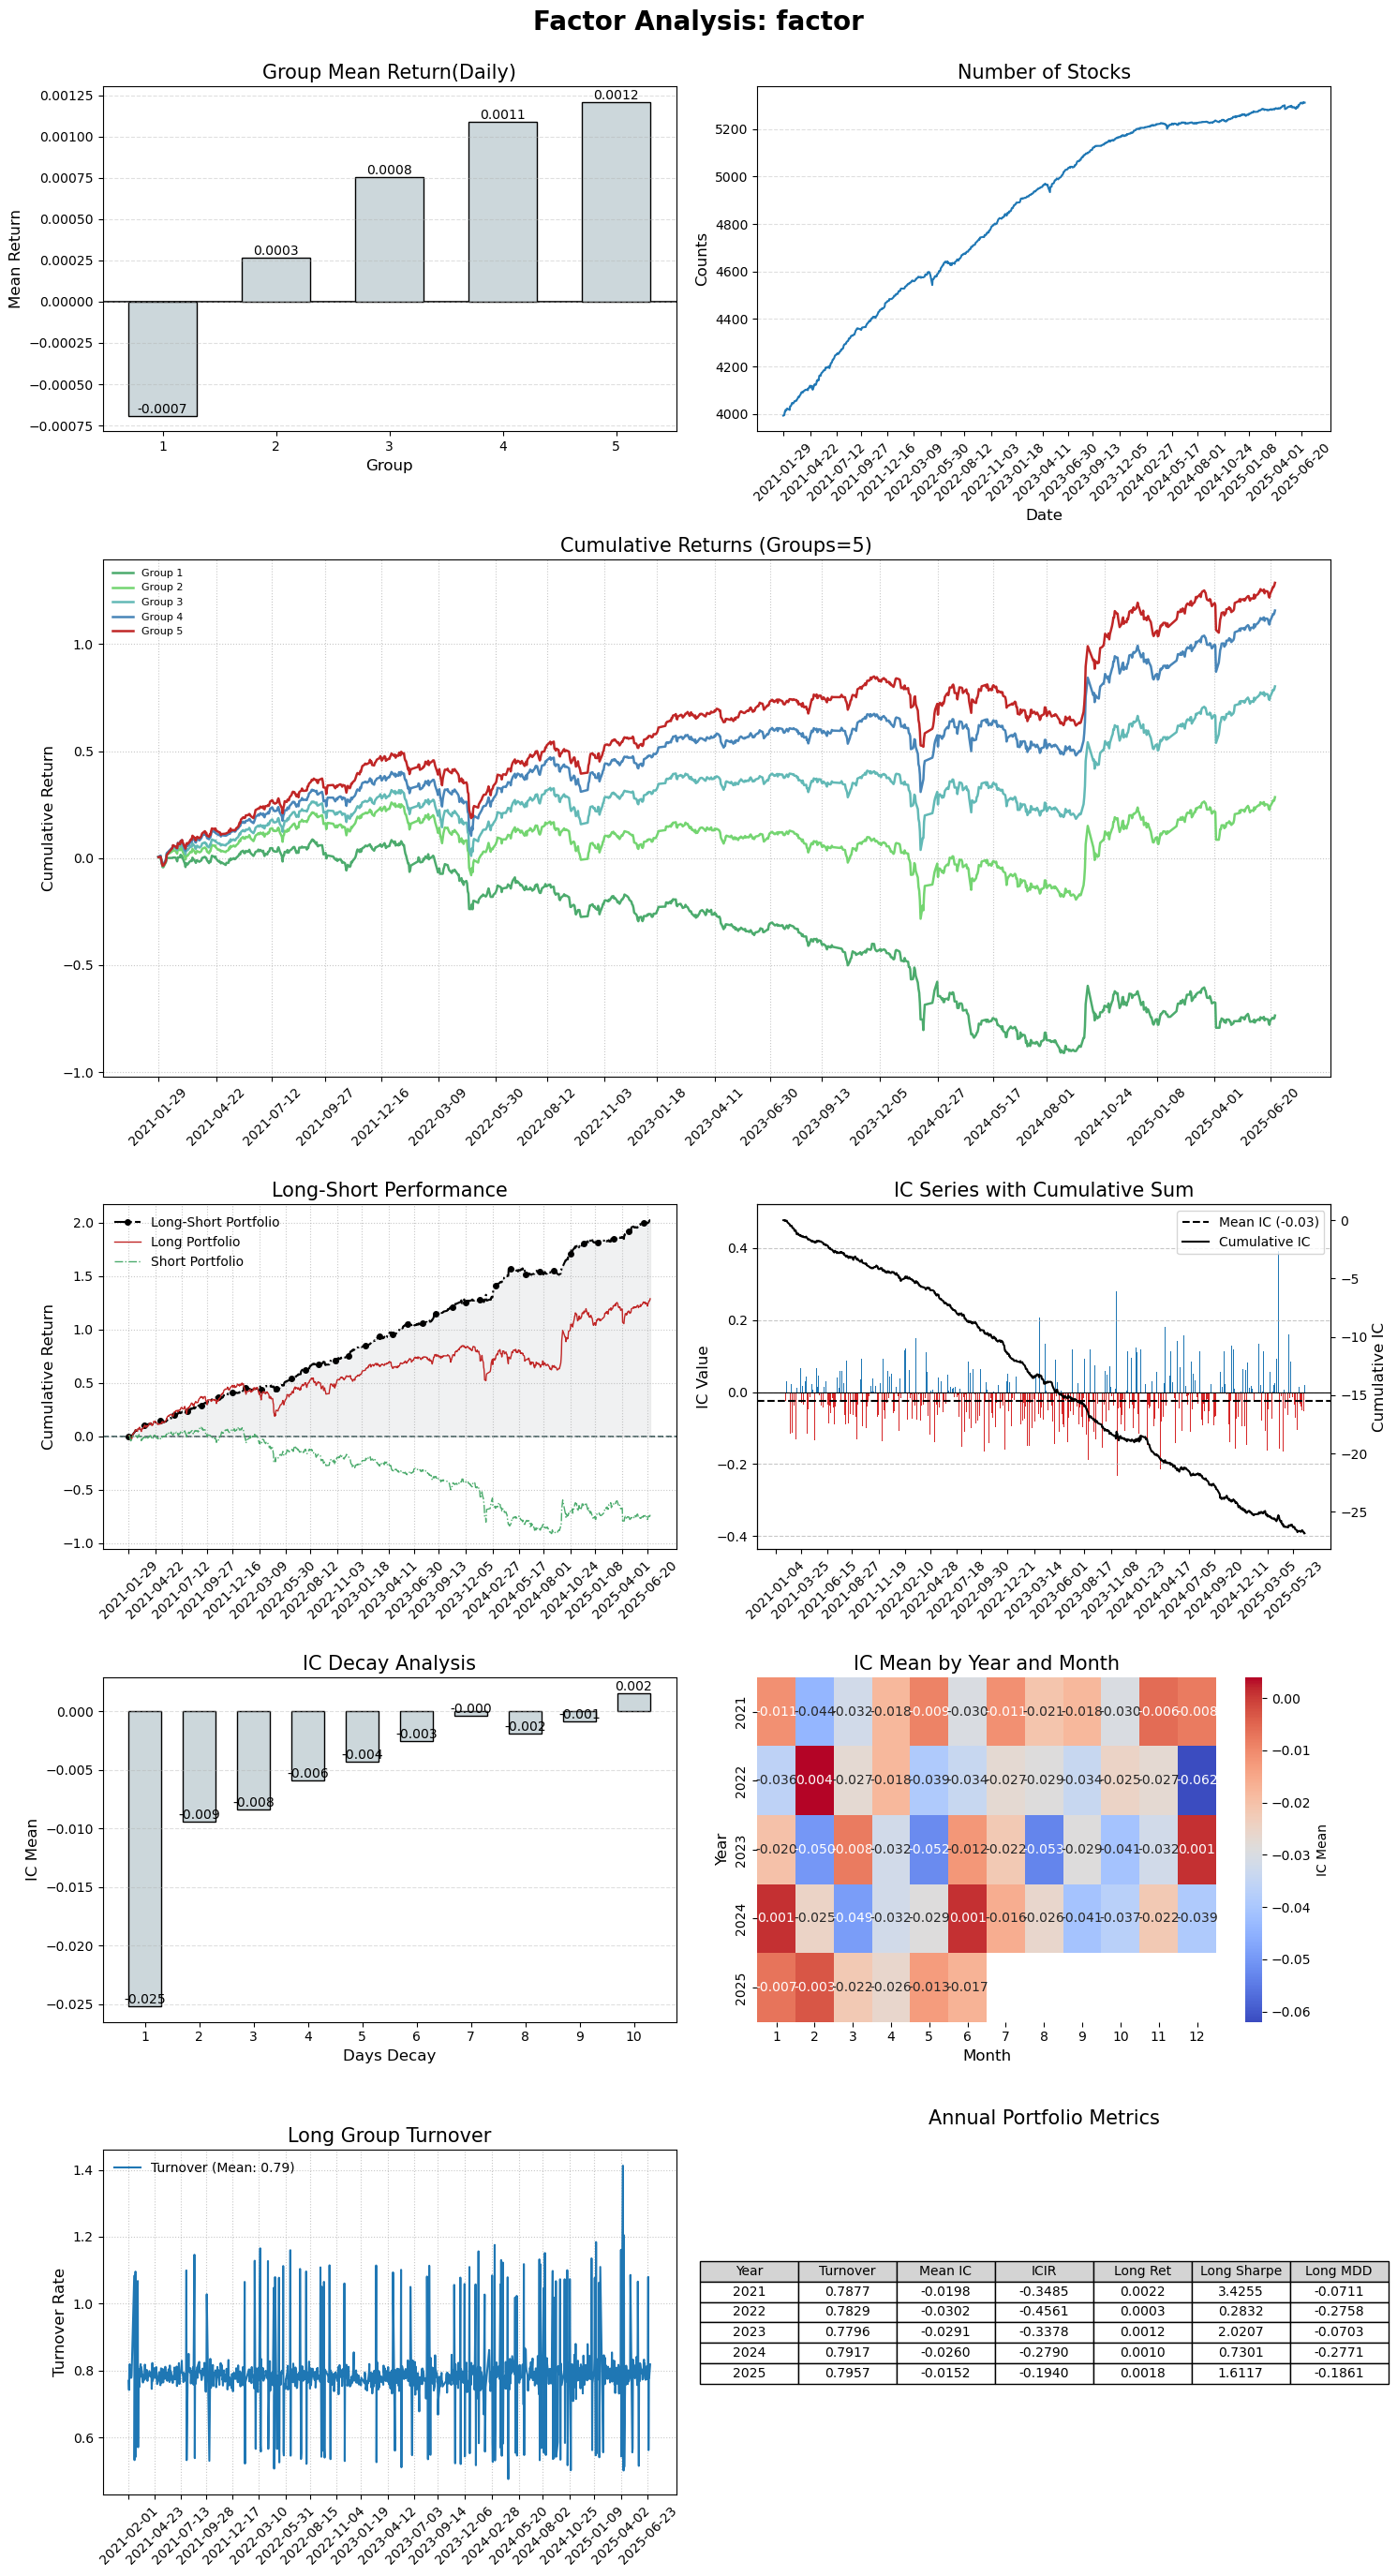

+--------------------+-----------+
| IC                 | -0.025    |
+--------------------+-----------+
| ICIR               |  0.325    |
+--------------------+-----------+
| Long Annual Return |  0.304    |
+--------------------+-----------+
| Long Max Drawdown  |  0.287    |
+--------------------+-----------+
| Long Sharpe        |  0.845    |
+--------------------+-----------+
| Short Max Drawdown |  0.655    |
+--------------------+-----------+
| Short Sharpe       | -1.168    |
+--------------------+-----------+
| LS Annual Return   |  0.478    |
+--------------------+-----------+
| LS Max Drawdawn    |  0.068    |
+--------------------+-----------+
| LS Sharpe          |  3.209    |
+--------------------+-----------+
| turnover           |  0.786569 |
+--------------------+-----------+


,IC,ICIR,Long Annual Return,Long Max Drawdown,Long Sharpe,Short Max Drawdown,Short Sharpe,LS Annual Return,LS Max Drawdawn,LS Sharpe,turnover
value,-0.0250,0.3250,0.3040,0.2870,0.8450,0.6550,-1.1680,0.4780,0.0680,3.2090,0.7866


In [4]:
# 分组收益图绘制，注意组号5为多头组，组号1为空头组
result, group_returns, ic = factor_backtest(factor_df,
                                            factor_name = 'factor', # 因子名称
                                            start_date = start_date,
                                            end_date = end_date, 
                                            lag_days = 1, # 用滞后多少日的收益率
                                            direction = -1, # 因子方向
                                            group = 5,   # 因子分组数
                                            neutralization = False, # 因子中性化选项
                                            zscore = True, # 因子标准化选项
                                            cut_extreme = True # 是否剔除极端值
                                            )
result

In [6]:
table_data

array([[ 2.0210e+03,  7.8770e-01, -1.9800e-02, -3.4850e-01,  2.2000e-03,
         3.4255e+00, -7.1100e-02],
       [ 2.0220e+03,  7.8290e-01, -3.0200e-02, -4.5610e-01,  3.0000e-04,
         2.8320e-01, -2.7580e-01],
       [ 2.0230e+03,  7.7960e-01, -2.9100e-02, -3.3780e-01,  1.2000e-03,
         2.0207e+00, -7.0300e-02],
       [ 2.0240e+03,  7.9170e-01, -2.6000e-02, -2.7900e-01,  1.0000e-03,
         7.3010e-01, -2.7710e-01],
       [ 2.0250e+03,  7.9570e-01, -1.5200e-02, -1.9400e-01,  1.8000e-03,
         1.6117e+00, -1.8610e-01]])